In [ ]:
!pip install torch torchvision scikit-learn matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

# Imports:

---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Dataset sample
---



In [ ]:
dataset_path = '/content/drive/MyDrive/banana_data/Banana Ripeness Classification Dataset'

for folder in ['test', 'train', 'valid']:
    folder_path = os.path.join(dataset_path, folder)
    if os.path.isdir(folder_path):
        print(f"Counting images in the '{folder}' folder:")
        for sub_folder in os.listdir(folder_path):
            sub_folder_path = os.path.join(folder_path, sub_folder)
            if os.path.isdir(sub_folder_path):
                image_count = len([f for f in os.listdir(sub_folder_path) if os.path.isfile(os.path.join(sub_folder_path, f))])
                print(f"  - '{sub_folder}': {image_count} images")
    else:
        print(f"Error: Folder '{folder}' not found in the dataset path.")

Counting images in the 'test' folder:
  - 'rotten': 185 images
  - 'overripe': 113 images
  - 'unripe': 110 images
  - 'ripe': 154 images
Counting images in the 'train' folder:
  - 'overripe': 2349 images
  - 'unripe': 1912 images
  - 'ripe': 3522 images
  - 'rotten': 4020 images
Counting images in the 'valid' folder:
  - 'rotten': 388 images
  - 'overripe': 229 images
  - 'unripe': 167 images
  - 'ripe': 339 images


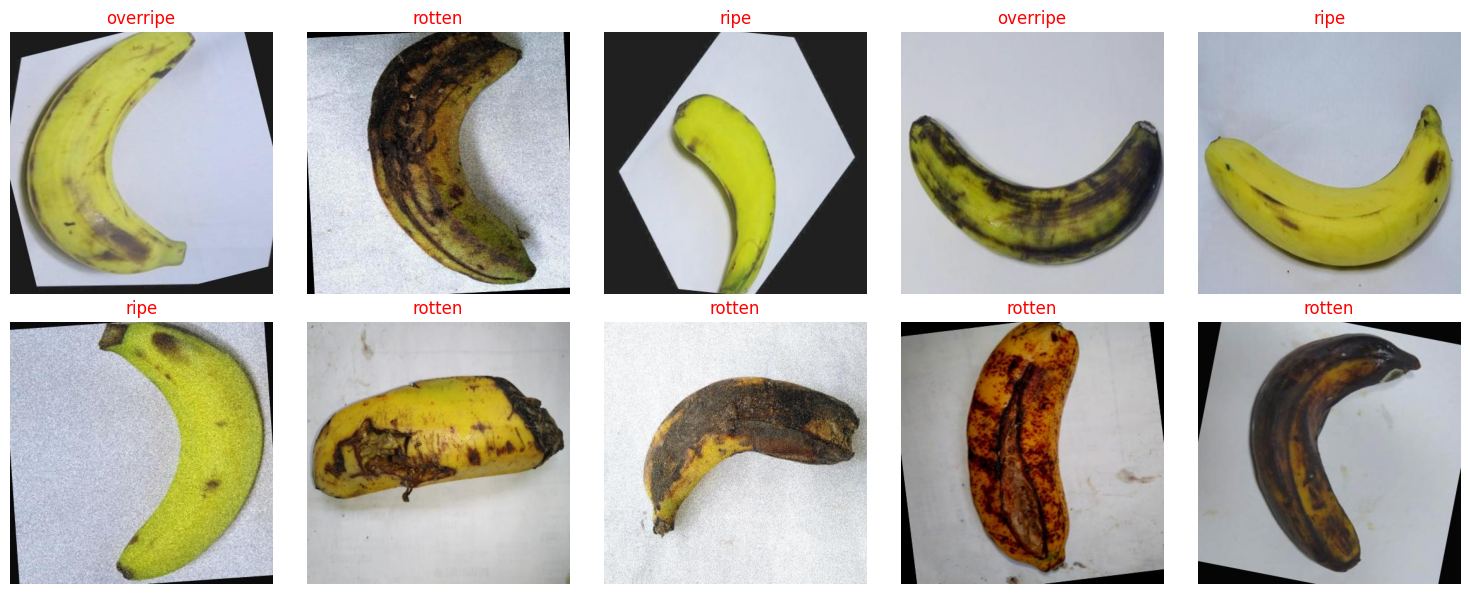

In [ ]:
# Randomly select 10 image paths and their corresponding labels

dataset_path = '/content/drive/MyDrive/banana_data/Banana Ripeness Classification Dataset'
train_path = os.path.join(dataset_path, 'train')

image_paths = []
labels = []

if os.path.isdir(train_path):
    for label in os.listdir(train_path):
        label_path = os.path.join(train_path, label)
        if os.path.isdir(label_path):
            for image_file in os.listdir(label_path):
                image_path = os.path.join(label_path, image_file)
                if os.path.isfile(image_path):
                    image_paths.append(image_path)
                    labels.append(label)
else:
    print(f"Error: Folder '{train_path}' not found.")

if not image_paths:
    print("No images found in the training directory.")
else:
    num_images_to_display = min(10, len(image_paths))
    random_indices = random.sample(range(len(image_paths)), num_images_to_display)
    selected_image_paths = [image_paths[i] for i in random_indices]
    selected_labels = [labels[i] for i in random_indices]

    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    axes = axes.ravel()

    for i, image_path in enumerate(selected_image_paths):
        try:
            img = mpimg.imread(image_path)
            axes[i].imshow(img)
            axes[i].set_title(selected_labels[i], color='red')
            axes[i].axis('off')
        except Exception as e:
            print(f"Error loading image at {image_path}: {e}")

    # If there are fewer than 10 images, hide the empty subplots
    for j in range(num_images_to_display, 10):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# First Model: ResNet18

---



Number of classes: 4
Classes: ['overripe', 'ripe', 'rotten', 'unripe']


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 129MB/s]


Starting training with early stopping...


Epoch 1/10: 100%|██████████| 369/369 [58:03<00:00,  9.44s/batch, loss=0.1275]


Epoch 1/10, Training Loss: 0.4585, Training Accuracy: 84.32%, Validation Loss: 0.1700, Validation Accuracy: 95.28%


Epoch 2/10: 100%|██████████| 369/369 [21:29<00:00,  3.49s/batch, loss=0.2655]


Epoch 2/10, Training Loss: 0.2812, Training Accuracy: 89.96%, Validation Loss: 0.1559, Validation Accuracy: 95.19%


Epoch 3/10: 100%|██████████| 369/369 [21:21<00:00,  3.47s/batch, loss=0.2124]


Epoch 3/10, Training Loss: 0.2584, Training Accuracy: 90.93%, Validation Loss: 0.1436, Validation Accuracy: 95.19%


Epoch 4/10: 100%|██████████| 369/369 [21:23<00:00,  3.48s/batch, loss=0.1590]


Epoch 4/10, Training Loss: 0.2386, Training Accuracy: 91.78%, Validation Loss: 0.1282, Validation Accuracy: 95.90%


Epoch 5/10: 100%|██████████| 369/369 [21:21<00:00,  3.47s/batch, loss=0.1664]


Epoch 5/10, Training Loss: 0.2311, Training Accuracy: 91.77%, Validation Loss: 0.1260, Validation Accuracy: 95.46%


Epoch 6/10: 100%|██████████| 369/369 [21:20<00:00,  3.47s/batch, loss=0.1965]


Epoch 6/10, Training Loss: 0.2401, Training Accuracy: 91.39%, Validation Loss: 0.1239, Validation Accuracy: 96.17%


Epoch 7/10: 100%|██████████| 369/369 [21:26<00:00,  3.49s/batch, loss=0.3595]


Epoch 7/10, Training Loss: 0.2280, Training Accuracy: 91.55%, Validation Loss: 0.1408, Validation Accuracy: 95.37%


Epoch 8/10: 100%|██████████| 369/369 [21:25<00:00,  3.48s/batch, loss=0.1896]


Epoch 8/10, Training Loss: 0.2257, Training Accuracy: 91.81%, Validation Loss: 0.1300, Validation Accuracy: 95.64%
Early stopping triggered after 8 epochs!
Training finished!
Accuracy on the test set: 95.73%


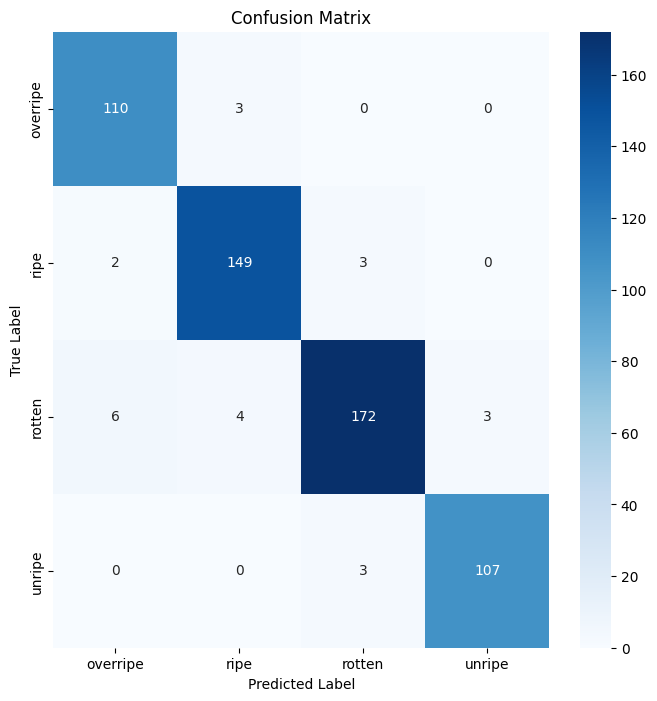

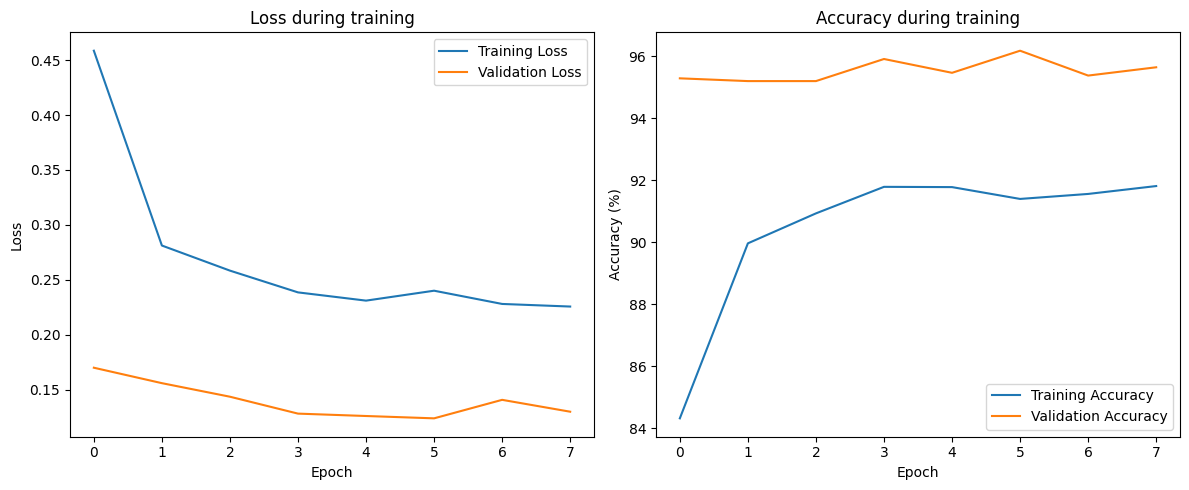

In [ ]:
import os
import torch
import torchvision
from torchvision import transforms, datasets, models
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

# Define the dataset path
dataset_path = '/content/drive/MyDrive/banana_data/Banana Ripeness Classification Dataset'
train_dir = os.path.join(dataset_path, 'train')
valid_dir = os.path.join(dataset_path, 'valid')
test_dir = os.path.join(dataset_path, 'test')

# Define data transformations
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

valid_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the datasets using ImageFolder
train_dataset = datasets.ImageFolder(train_dir, transform=train_transforms)
valid_dataset = datasets.ImageFolder(valid_dir, transform=valid_transforms)
test_dataset = datasets.ImageFolder(test_dir, transform=test_transforms)

# Create DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Define the number of classes
num_classes = len(train_dataset.classes)
print(f"Number of classes: {num_classes}")
print(f"Classes: {train_dataset.classes}")

# Load the pre-trained ResNet18 model
model = models.resnet18(pretrained=True)


# Freeze all layers except the final fully connected layer
for param in model.parameters():
    param.requires_grad = False

# Replace the last fully connected layer
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, num_classes)

# Move the model to the GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)

# Number of training epochs
num_epochs = 10  # Increased max epochs to allow for early stopping
patience = 2     # Number of epochs to wait for improvement
best_valid_loss = float('inf')
epochs_no_improve = 0
history = {'train_loss': [], 'valid_loss': [], 'train_acc': [], 'valid_acc': []}

# Training loop with early stopping
print("Starting training with early stopping...")
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    progress_bar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch')
    for inputs, labels in progress_bar:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
        progress_bar.set_postfix({'loss': f'{loss.item():.4f}'})

    epoch_loss = running_loss / len(train_dataset)
    epoch_acc = 100 * correct_train / total_train
    history['train_loss'].append(epoch_loss)
    history['train_acc'].append(epoch_acc)

    # Validation phase
    model.eval()
    running_loss_val = 0.0
    correct_valid = 0
    total_valid = 0
    with torch.no_grad():
        for inputs, labels in valid_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            loss_val = criterion(outputs, labels)
            running_loss_val += loss_val.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total_valid += labels.size(0)
            correct_valid += (predicted == labels).sum().item()

    epoch_loss_val = running_loss_val / len(valid_dataset)
    epoch_acc_val = 100 * correct_valid / total_valid
    history['valid_loss'].append(epoch_loss_val)
    history['valid_acc'].append(epoch_acc_val)

    print(f'Epoch {epoch+1}/{num_epochs}, Training Loss: {epoch_loss:.4f}, Training Accuracy: {epoch_acc:.2f}%, Validation Loss: {epoch_loss_val:.4f}, Validation Accuracy: {epoch_acc_val:.2f}%')

    # Early stopping check
    if epoch_loss_val < best_valid_loss:
        best_valid_loss = epoch_loss_val
        epochs_no_improve = 0
        torch.save(model.state_dict(), 'best_model.pth') # Save the best model
    else:
        epochs_no_improve += 1
        if epochs_no_improve == patience:
            print(f'Early stopping triggered after {epoch+1} epochs!')
            model.load_state_dict(torch.load('best_model.pth')) # Load the best model
            break

print("Training finished!")

# Test phase
model.eval()
all_predictions = []
all_labels = []
correct_test = 0
total_test = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()
        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

test_accuracy = 100 * correct_test / total_test
print(f'Accuracy on the test set: {test_accuracy:.2f}%')

# Confusion matrix
cm = confusion_matrix(all_labels, all_predictions)
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_dataset.classes, yticklabels=train_dataset.classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plotting loss and accuracy curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Training Loss')
plt.plot(history['valid_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss during training')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['train_acc'], label='Training Accuracy')
plt.plot(history['valid_acc'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy during training')
plt.legend()
plt.tight_layout()
plt.show()

# Second Model: ResNet50


---




Using model: resnet50
Classes: ['overripe', 'ripe', 'rotten', 'unripe']
Starting training...


Epoch 1/5: 100%|██████████| 185/185 [1:09:25<00:00, 22.52s/batch]


Epoch 1/5, Train Loss: 0.5809, Train Acc: 89.82%, Val Loss: 0.4679, Val Acc: 94.66%


Epoch 2/5: 100%|██████████| 185/185 [1:07:03<00:00, 21.75s/batch]


Epoch 2/5, Train Loss: 0.5078, Train Acc: 92.93%, Val Loss: 0.4475, Val Acc: 96.17%


Epoch 3/5: 100%|██████████| 185/185 [1:07:03<00:00, 21.75s/batch]


Epoch 3/5, Train Loss: 0.4832, Train Acc: 94.22%, Val Loss: 0.4296, Val Acc: 97.06%


Epoch 4/5: 100%|██████████| 185/185 [1:07:54<00:00, 22.02s/batch]


Epoch 4/5, Train Loss: 0.4790, Train Acc: 94.43%, Val Loss: 0.4342, Val Acc: 96.71%


Epoch 5/5: 100%|██████████| 185/185 [1:07:44<00:00, 21.97s/batch]


Epoch 5/5, Train Loss: 0.4688, Train Acc: 94.82%, Val Loss: 0.4205, Val Acc: 97.24%
Test Accuracy: 95.91%

Classification Report:
              precision    recall  f1-score   support

    overripe       0.94      0.98      0.96       113
        ripe       0.94      0.97      0.96       154
      rotten       0.99      0.91      0.95       185
      unripe       0.96      0.99      0.97       110

    accuracy                           0.96       562
   macro avg       0.96      0.97      0.96       562
weighted avg       0.96      0.96      0.96       562



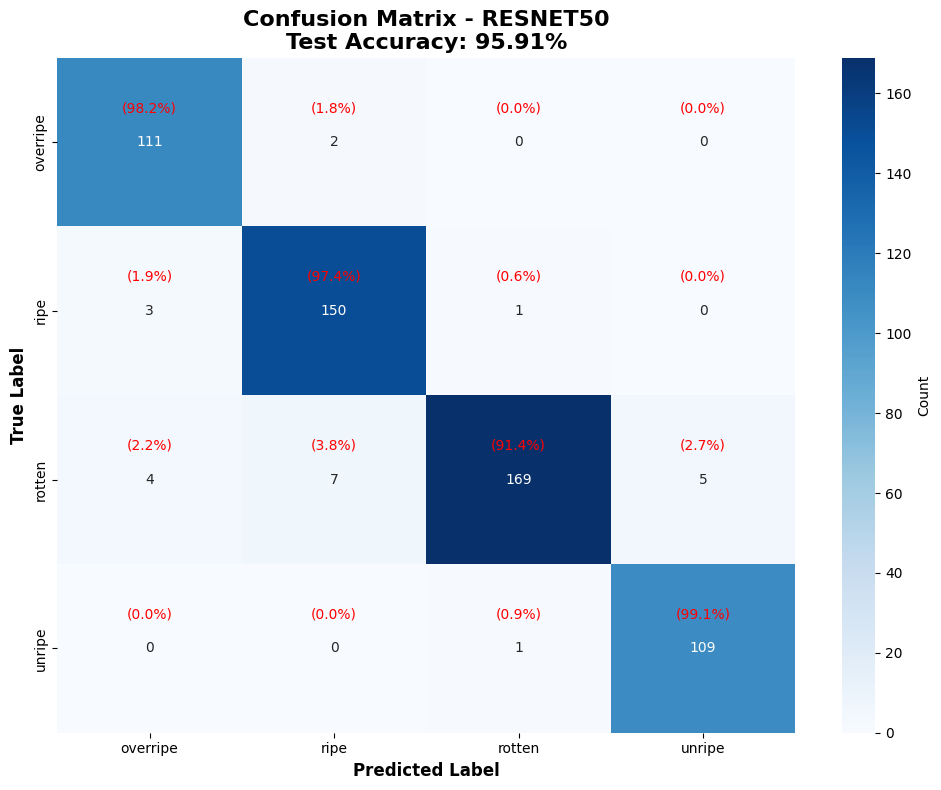

Confusion matrix saved to: /content/drive/MyDrive/banana_data/banana_models/confusion_matrix_resnet50.png


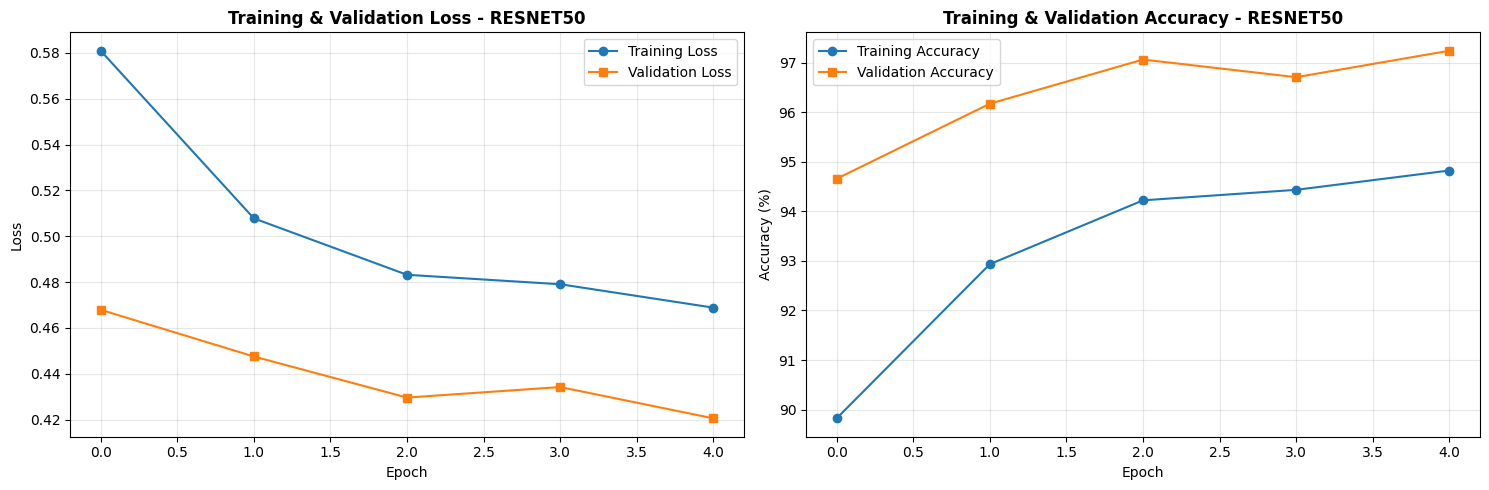

Training history saved to: /content/drive/MyDrive/banana_data/banana_models/training_history_resnet50.png

TRAINING SUMMARY - RESNET50
Final Test Accuracy: 95.91%
Best model saved to: /content/drive/MyDrive/banana_data/banana_models/best_resnet50_enhanced.pth
Final model saved to: /content/drive/MyDrive/banana_data/banana_models/final_resnet50_enhanced.pth
Classes: overripe, ripe, rotten, unripe
Total epochs: 5
Best validation accuracy: 97.24%
Final validation accuracy: 97.24%


In [ ]:
import os
import torch
import torchvision
from torchvision import transforms, datasets, models
from torch.utils.data import DataLoader, WeightedRandomSampler
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
from collections import Counter


MODEL_CONFIGS = {
    'resnet50': {
        'model_func': models.resnet50,
        'classifier_name': 'fc',
        'classifier_idx': None,
        'input_size': 224
    },
}

SELECTED_MODEL = 'resnet50'


# Define dataset and model save paths
base_path = '/content/drive/MyDrive/banana_data'
dataset_path = os.path.join(base_path, 'Banana Ripeness Classification Dataset')
train_dir = os.path.join(dataset_path, 'train')
valid_dir = os.path.join(dataset_path, 'valid')
test_dir = os.path.join(dataset_path, 'test')
save_dir = os.path.join(base_path, 'banana_models')
os.makedirs(save_dir, exist_ok=True)

# Data transformations
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.2),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomGrayscale(p=0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    transforms.RandomErasing(p=0.1, scale=(0.02, 0.33))
])

valid_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

test_transforms = valid_transforms

# Load datasets
train_dataset = datasets.ImageFolder(train_dir, transform=train_transforms)
valid_dataset = datasets.ImageFolder(valid_dir, transform=valid_transforms)
test_dataset = datasets.ImageFolder(test_dir, transform=test_transforms)

# Class weights
class_counts = Counter([train_dataset[i][1] for i in range(len(train_dataset))])
total_samples = len(train_dataset)
class_weights = [total_samples / class_counts[i] for i in range(len(train_dataset.classes))]
sample_weights = [class_weights[train_dataset[i][1]] for i in range(len(train_dataset))]
sampler = WeightedRandomSampler(sample_weights, len(sample_weights))

# DataLoaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=sampler, num_workers=4)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

# ======================== MODEL SETUP ========================
def create_model(model_name, num_classes):
    config = MODEL_CONFIGS[model_name]
    model = config['model_func'](weights='DEFAULT')

    # Freeze feature extraction layers
    for param in model.parameters():
        param.requires_grad = False

    # Get the classifier layer
    if config['classifier_idx'] is not None:
        classifier = getattr(model, config['classifier_name'])
        if isinstance(classifier, nn.Sequential):
            num_ftrs = classifier[config['classifier_idx']].in_features
        else:
            num_ftrs = classifier.in_features
    else:
        classifier = getattr(model, config['classifier_name'])
        num_ftrs = classifier.in_features

    # Create new classifier
    new_classifier = nn.Sequential(
        nn.Dropout(p=0.3),
        nn.Linear(num_ftrs, 512),
        nn.ReLU(),
        nn.BatchNorm1d(512),
        nn.Dropout(p=0.4),
        nn.Linear(512, 256),
        nn.ReLU(),
        nn.BatchNorm1d(256),
        nn.Dropout(p=0.3),
        nn.Linear(256, num_classes)
    )

    # Replace the classifier
    setattr(model, config['classifier_name'], new_classifier)

    return model

# Model
num_classes = len(train_dataset.classes)
model = create_model(SELECTED_MODEL, num_classes)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

print(f"Using model: {SELECTED_MODEL}")
print(f"Classes: {train_dataset.classes}")

class LabelSmoothingCrossEntropy(nn.Module):
    def __init__(self, eps=0.1, reduction='mean'):
        super().__init__()
        self.eps = eps
        self.reduction = reduction

    def forward(self, output, target):
        c = output.size()[-1]
        log_preds = torch.log_softmax(output, dim=-1)
        loss = -log_preds.sum(dim=-1).mean() if self.reduction == 'mean' else -log_preds.sum(dim=-1)
        nll = torch.nn.functional.nll_loss(log_preds, target, reduction=self.reduction)
        return (1 - self.eps) * nll + self.eps * loss / c

criterion = LabelSmoothingCrossEntropy(eps=0.1)

# Get trainable parameters (only classifier layers)
trainable_params = []
for name, param in model.named_parameters():
    if param.requires_grad:
        trainable_params.append(param)

optimizer = optim.AdamW(trainable_params, lr=0.001, weight_decay=0.01)
scheduler = CosineAnnealingLR(optimizer, T_max=20, eta_min=1e-6)

best_model_path = os.path.join(save_dir, f'best_{SELECTED_MODEL}_enhanced.pth')
final_model_path = os.path.join(save_dir, f'final_{SELECTED_MODEL}_enhanced.pth')

def train_phase(model, num_epochs, patience):
    best_valid_loss = float('inf')
    epochs_no_improve = 0
    history = {'train_loss': [], 'valid_loss': [], 'train_acc': [], 'valid_acc': []}

    for epoch in range(num_epochs):
        model.train()
        running_loss, correct_train, total_train = 0.0, 0, 0
        progress_bar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch')

        for inputs, labels in progress_bar:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        train_loss = running_loss / len(train_dataset)
        train_acc = 100 * correct_train / total_train
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)

        model.eval()
        val_loss, correct_val, total_val = 0.0, 0, 0
        with torch.no_grad():
            for inputs, labels in valid_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

        val_loss /= len(valid_dataset)
        val_acc = 100 * correct_val / total_val
        history['valid_loss'].append(val_loss)
        history['valid_acc'].append(val_acc)
        scheduler.step()

        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')

        if val_loss < best_valid_loss:
            best_valid_loss = val_loss
            epochs_no_improve = 0
            torch.save(model.state_dict(), best_model_path)
        else:
            epochs_no_improve += 1
            if epochs_no_improve == patience:
                print(f"Early stopping triggered after {epoch+1} epochs")
                model.load_state_dict(torch.load(best_model_path))
                break

    return history

# ======================== TRAINING ========================
print("Starting training...")
history = train_phase(model, num_epochs=5, patience=5)
torch.save(model.state_dict(), final_model_path)

# ======================== TESTING AND VISUALIZATION ========================
model.eval()
all_predictions, all_labels = [], []
correct_test, total_test = 0, 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()
        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

test_accuracy = 100 * correct_test / total_test
print(f'Test Accuracy: {test_accuracy:.2f}%')
print("\nClassification Report:")
print(classification_report(all_labels, all_predictions, target_names=train_dataset.classes))

# ======================== CONFUSION MATRIX VISUALIZATION ========================
def plot_confusion_matrix(y_true, y_pred, classes, model_name, accuracy):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))

    # Create heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes, yticklabels=classes,
                cbar_kws={'label': 'Count'})

    plt.title(f'Confusion Matrix - {model_name.upper()}\nTest Accuracy: {accuracy:.2f}%',
              fontsize=16, fontweight='bold')
    plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
    plt.ylabel('True Label', fontsize=12, fontweight='bold')

    # Add percentage annotations
    for i in range(len(classes)):
        for j in range(len(classes)):
            percentage = (cm[i, j] / cm[i].sum()) * 100
            plt.text(j + 0.5, i + 0.3, f'({percentage:.1f}%)',
                    ha='center', va='center', fontsize=10, color='red')

    plt.tight_layout()

    # Save the plot
    plot_path = os.path.join(save_dir, f'confusion_matrix_{model_name}.png')
    plt.savefig(plot_path, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Confusion matrix saved to: {plot_path}")

# Plot confusion matrix
plot_confusion_matrix(all_labels, all_predictions, train_dataset.classes,
                     SELECTED_MODEL, test_accuracy)

# ======================== TRAINING HISTORY VISUALIZATION ========================
def plot_training_history(history, model_name):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Loss plot
    ax1.plot(history['train_loss'], label='Training Loss', marker='o')
    ax1.plot(history['valid_loss'], label='Validation Loss', marker='s')
    ax1.set_title(f'Training & Validation Loss - {model_name.upper()}', fontweight='bold')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Accuracy plot
    ax2.plot(history['train_acc'], label='Training Accuracy', marker='o')
    ax2.plot(history['valid_acc'], label='Validation Accuracy', marker='s')
    ax2.set_title(f'Training & Validation Accuracy - {model_name.upper()}', fontweight='bold')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy (%)')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()

    # Save the plot
    plot_path = os.path.join(save_dir, f'training_history_{model_name}.png')
    plt.savefig(plot_path, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Training history saved to: {plot_path}")

# Plot training history
plot_training_history(history, SELECTED_MODEL)

# ======================== SUMMARY ========================
print(f"\n{'='*50}")
print(f"TRAINING SUMMARY - {SELECTED_MODEL.upper()}")
print(f"{'='*50}")
print(f"Final Test Accuracy: {test_accuracy:.2f}%")
print(f"Best model saved to: {best_model_path}")
print(f"Final model saved to: {final_model_path}")
print(f"Classes: {', '.join(train_dataset.classes)}")
print(f"Total epochs: {len(history['train_loss'])}")
print(f"Best validation accuracy: {max(history['valid_acc']):.2f}%")
print(f"Final validation accuracy: {history['valid_acc'][-1]:.2f}%")

# Third Model: EfficienNetB2

---



In [ ]:
import os
import torch
import torchvision
from torchvision import transforms, datasets, models
from torch.utils.data import DataLoader, WeightedRandomSampler
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
from collections import Counter

# Define dataset and model save paths
base_path = '/content/drive/MyDrive/banana_data'
dataset_path = os.path.join(base_path, 'Banana Ripeness Classification Dataset')
train_dir = os.path.join(dataset_path, 'train')
valid_dir = os.path.join(dataset_path, 'valid')
test_dir = os.path.join(dataset_path, 'test')
save_dir = os.path.join(base_path, 'banana_models')
os.makedirs(save_dir, exist_ok=True)

# Data transformations
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.2),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomGrayscale(p=0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    transforms.RandomErasing(p=0.1, scale=(0.02, 0.33))
])

valid_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

test_transforms = valid_transforms

# Load datasets
train_dataset = datasets.ImageFolder(train_dir, transform=train_transforms)
valid_dataset = datasets.ImageFolder(valid_dir, transform=valid_transforms)
test_dataset = datasets.ImageFolder(test_dir, transform=test_transforms)

# Class weights
class_counts = Counter([train_dataset[i][1] for i in range(len(train_dataset))])
total_samples = len(train_dataset)
class_weights = [total_samples / class_counts[i] for i in range(len(train_dataset.classes))]
sample_weights = [class_weights[train_dataset[i][1]] for i in range(len(train_dataset))]
sampler = WeightedRandomSampler(sample_weights, len(sample_weights))

# DataLoaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=sampler, num_workers=4)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

# Model
num_classes = len(train_dataset.classes)
model = torchvision.models.efficientnet_b2(pretrained=True)

def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False

set_parameter_requires_grad(model, True)

num_ftrs = model.classifier[1].in_features
model.classifier = nn.Sequential(
    nn.Dropout(p=0.3),
    nn.Linear(num_ftrs, 512),
    nn.ReLU(),
    nn.BatchNorm1d(512),
    nn.Dropout(p=0.4),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.BatchNorm1d(256),
    nn.Dropout(p=0.3),
    nn.Linear(256, num_classes)
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

class LabelSmoothingCrossEntropy(nn.Module):
    def __init__(self, eps=0.1, reduction='mean'):
        super().__init__()
        self.eps = eps
        self.reduction = reduction

    def forward(self, output, target):
        c = output.size()[-1]
        log_preds = torch.log_softmax(output, dim=-1)
        loss = -log_preds.sum(dim=-1).mean() if self.reduction == 'mean' else -log_preds.sum(dim=-1)
        nll = torch.nn.functional.nll_loss(log_preds, target, reduction=self.reduction)
        return (1 - self.eps) * nll + self.eps * loss / c

criterion = LabelSmoothingCrossEntropy(eps=0.1)
optimizer = optim.AdamW(model.classifier.parameters(), lr=0.001, weight_decay=0.01)
scheduler = CosineAnnealingLR(optimizer, T_max=20, eta_min=1e-6)

best_model_path = os.path.join(save_dir, 'best_efficientnet_b2_enhanced.pth')
final_model_path = os.path.join(save_dir, 'final_efficientnet_b2_enhanced.pth')

def train_phase(model, num_epochs, patience):
    best_valid_loss = float('inf')
    epochs_no_improve = 0
    history = {'train_loss': [], 'valid_loss': [], 'train_acc': [], 'valid_acc': []}

    for epoch in range(num_epochs):
        model.train()
        running_loss, correct_train, total_train = 0.0, 0, 0
        progress_bar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch')

        for inputs, labels in progress_bar:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        train_loss = running_loss / len(train_dataset)
        train_acc = 100 * correct_train / total_train
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)

        model.eval()
        val_loss, correct_val, total_val = 0.0, 0, 0
        with torch.no_grad():
            for inputs, labels in valid_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

        val_loss /= len(valid_dataset)
        val_acc = 100 * correct_val / total_val
        history['valid_loss'].append(val_loss)
        history['valid_acc'].append(val_acc)
        scheduler.step()

        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')

        if val_loss < best_valid_loss:
            best_valid_loss = val_loss
            epochs_no_improve = 0
            torch.save(model.state_dict(), best_model_path)
        else:
            epochs_no_improve += 1
            if epochs_no_improve == patience:
                model.load_state_dict(torch.load(best_model_path))
                break

    return history

history = train_phase(model, num_epochs=15, patience=5)
torch.save(model.state_dict(), final_model_path)

model.eval()
all_predictions, all_labels = [], []
correct_test, total_test = 0, 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()
        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

print(f'Test Accuracy: {100 * correct_test / total_test:.2f}%')
print(classification_report(all_labels, all_predictions, target_names=train_dataset.classes))

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B2_Weights.IMAGENET1K_V1`. You can also use `weight

Epoch 1/15, Train Loss: 0.6305, Train Acc: 87.26%, Val Loss: 0.4816, Val Acc: 94.30%


Epoch 2/15: 100%|██████████| 185/185 [37:43<00:00, 12.23s/batch]


Epoch 2/15, Train Loss: 0.5332, Train Acc: 91.70%, Val Loss: 0.4662, Val Acc: 94.84%


Epoch 3/15: 100%|██████████| 185/185 [38:03<00:00, 12.35s/batch]


Epoch 3/15, Train Loss: 0.5149, Train Acc: 92.67%, Val Loss: 0.4561, Val Acc: 95.28%


Epoch 4/15: 100%|██████████| 185/185 [37:37<00:00, 12.20s/batch]


Epoch 4/15, Train Loss: 0.5058, Train Acc: 92.93%, Val Loss: 0.4588, Val Acc: 95.19%


Epoch 5/15: 100%|██████████| 185/185 [37:07<00:00, 12.04s/batch]


Epoch 5/15, Train Loss: 0.5009, Train Acc: 92.73%, Val Loss: 0.4270, Val Acc: 96.97%


Epoch 6/15: 100%|██████████| 185/185 [37:12<00:00, 12.07s/batch]


Epoch 6/15, Train Loss: 0.4870, Train Acc: 93.93%, Val Loss: 0.4250, Val Acc: 96.62%


Epoch 7/15: 100%|██████████| 185/185 [37:05<00:00, 12.03s/batch]


Epoch 7/15, Train Loss: 0.4911, Train Acc: 93.55%, Val Loss: 0.4249, Val Acc: 96.71%


Epoch 8/15: 100%|██████████| 185/185 [37:18<00:00, 12.10s/batch]


Epoch 8/15, Train Loss: 0.4777, Train Acc: 94.32%, Val Loss: 0.4312, Val Acc: 96.44%


Epoch 9/15: 100%|██████████| 185/185 [38:24<00:00, 12.46s/batch]


Epoch 9/15, Train Loss: 0.4733, Train Acc: 94.77%, Val Loss: 0.4185, Val Acc: 97.06%


Epoch 10/15: 100%|██████████| 185/185 [37:38<00:00, 12.21s/batch]


Epoch 10/15, Train Loss: 0.4656, Train Acc: 94.93%, Val Loss: 0.4168, Val Acc: 97.42%


Epoch 11/15: 100%|██████████| 185/185 [38:27<00:00, 12.47s/batch]


Epoch 11/15, Train Loss: 0.4680, Train Acc: 94.75%, Val Loss: 0.4146, Val Acc: 97.51%


Epoch 12/15: 100%|██████████| 185/185 [38:11<00:00, 12.39s/batch]


Epoch 12/15, Train Loss: 0.4626, Train Acc: 94.94%, Val Loss: 0.4116, Val Acc: 97.77%


Epoch 13/15: 100%|██████████| 185/185 [38:33<00:00, 12.51s/batch]


Epoch 13/15, Train Loss: 0.4629, Train Acc: 95.01%, Val Loss: 0.4074, Val Acc: 97.77%


Epoch 14/15: 100%|██████████| 185/185 [38:38<00:00, 12.53s/batch]


Epoch 14/15, Train Loss: 0.4646, Train Acc: 94.79%, Val Loss: 0.4094, Val Acc: 97.51%


Epoch 15/15: 100%|██████████| 185/185 [38:34<00:00, 12.51s/batch]


Epoch 15/15, Train Loss: 0.4603, Train Acc: 94.99%, Val Loss: 0.4056, Val Acc: 98.13%
Test Accuracy: 97.15%
              precision    recall  f1-score   support

    overripe       0.95      0.99      0.97       113
        ripe       0.98      0.97      0.98       154
      rotten       0.98      0.96      0.97       185
      unripe       0.97      0.96      0.97       110

    accuracy                           0.97       562
   macro avg       0.97      0.97      0.97       562
weighted avg       0.97      0.97      0.97       562



# Testing:

---



Detected classes: ['overripe', 'ripe', 'rotten', 'unripe']


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Prediction Results:
------------------------------------------------------------


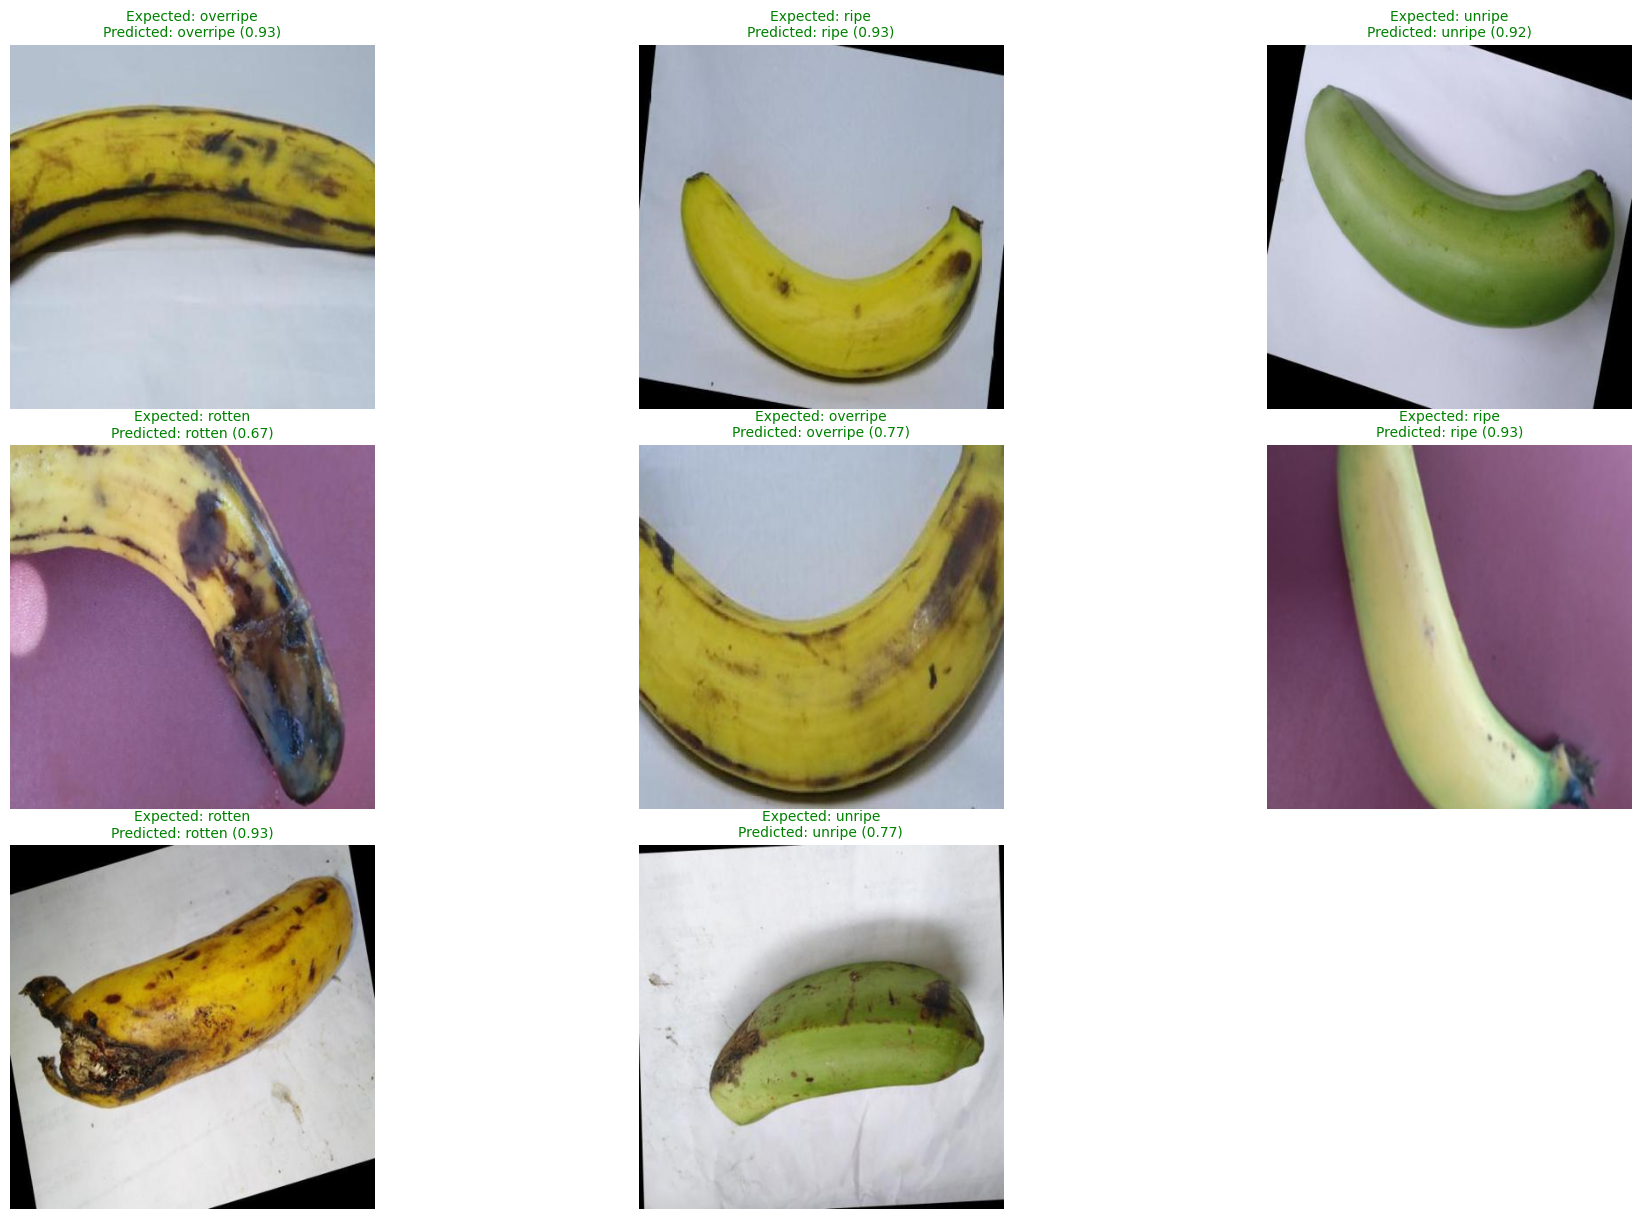


Model architecture: EfficientNet
Number of classes: 4
Class names: ['overripe', 'ripe', 'rotten', 'unripe']


In [ ]:
import torch
import torchvision
from torchvision import transforms, models
import torch.nn as nn
from PIL import Image
import os
import matplotlib.pyplot as plt

def load_efficientnet_model(model_path, num_classes):

    model = torchvision.models.efficientnet_b2(pretrained=False)

    num_ftrs = model.classifier[1].in_features
    model.classifier = nn.Sequential(
        nn.Dropout(p=0.3),
        nn.Linear(num_ftrs, 512),
        nn.ReLU(),
        nn.BatchNorm1d(512),
        nn.Dropout(p=0.4),
        nn.Linear(512, 256),
        nn.ReLU(),
        nn.BatchNorm1d(256),
        nn.Dropout(p=0.3),
        nn.Linear(256, num_classes)
    )

    model.load_state_dict(torch.load(model_path, map_location='cpu'))
    model.eval()
    return model

def predict_image(image_path, model, transform, class_names):

    image = Image.open(image_path).convert('RGB')
    image = transform(image).float()
    image = image.unsqueeze(0)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    image = image.to(device)

    with torch.no_grad():
        output = model(image)
        probabilities = torch.nn.functional.softmax(output[0], dim=0)
        _, predicted = torch.max(output.data, 1)

    pred_class_idx = predicted.item()
    confidence = probabilities[pred_class_idx].item()

    return pred_class_idx, class_names[pred_class_idx], confidence

num_classes = 4

dataset_path = '/content/drive/MyDrive/banana_data/Banana Ripeness Classification Dataset/train'
if os.path.exists(dataset_path):
    class_names = sorted(os.listdir(dataset_path))
    print(f"Detected classes: {class_names}")
else:
    class_names = ['overripe', 'ripe', 'rotten', 'unripe']
    print(f"Using fallback classes: {class_names}")

model_path = '/content/drive/MyDrive/banana_data/banana_models/best_efficientnet_b2_enhanced.pth'
model = load_efficientnet_model(model_path, num_classes)

predict_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_image_paths = [
    "/content/drive/MyDrive/banana_data/Banana Ripeness Classification Dataset/test/overripe/musa-acuminata-mold-e1a4d2b8-1d0a-11ec-af1f-d8c4975e38aa_jpg.rf.49b2874813b9606a2e643b694212cfc1.jpg",
    "/content/drive/MyDrive/banana_data/Banana Ripeness Classification Dataset/test/ripe/musa-acuminata-freshripe-4656235d-2653-11ec-bb2b-d8c4975e38aa_jpg.rf.b53177feec4571b0d1de72cbe9dfbc1a.jpg",
    "/content/drive/MyDrive/banana_data/Banana Ripeness Classification Dataset/test/unripe/musa-acuminata-freshunripe-1cdf07a1-2653-11ec-a4b4-d8c4975e38aa_jpg.rf.9500aa90b98dc6f34859be314aa61dc2.jpg",
    "/content/drive/MyDrive/banana_data/Banana Ripeness Classification Dataset/test/rotten/musa-acuminata-banana-9a014dd2-394a-11ec-9097-d8c4975e38aa_jpg.rf.93e7b40811cfd3f739da38c58e8b62f0.jpg",

    "/content/drive/MyDrive/banana_data/Banana Ripeness Classification Dataset/test/overripe/musa-acuminata-overripe-74d28e6f-2653-11ec-a1c3-d8c4975e38aa_jpg.rf.c494b2c758d1430121a55d0607fd5f29.jpg",
    "/content/drive/MyDrive/banana_data/Banana Ripeness Classification Dataset/test/ripe/musa-acuminata-banana-ecae1565-394a-11ec-8c89-d8c4975e38aa_jpg.rf.792326db2e5c63d495d6166d49862bff.jpg",
    "/content/drive/MyDrive/banana_data/Banana Ripeness Classification Dataset/test/rotten/musa-acuminata-rotten-8c85f633-2653-11ec-b5f6-d8c4975e38aa_jpg.rf.d9c267753801201878461727e78b6acd.jpg",
    "/content/drive/MyDrive/banana_data/Banana Ripeness Classification Dataset/test/unripe/musa-acuminata-unripe-610e8c6e-2653-11ec-8930-d8c4975e38aa-Copy_jpg.rf.2c3abdb821ab756feff58e2cdb0bc3f3.jpg"
]

# Extract expected labels from file paths for comparison
expected_labels = []
for path in test_image_paths:
    if '/overripe/' in path:
        expected_labels.append('overripe')
    elif '/ripe/' in path:
        expected_labels.append('ripe')
    elif '/unripe/' in path:
        expected_labels.append('unripe')
    elif '/rotten/' in path:
        expected_labels.append('rotten')
    else:
        expected_labels.append('unknown')

num_images = len(test_image_paths)
cols = 3
rows = (num_images + cols - 1) // cols

plt.figure(figsize=(20, 4 * rows))
plt.subplots_adjust(wspace=0.05, hspace=0.2)

print("Prediction Results:")
print("-" * 60)

for i, (image_path, expected) in enumerate(zip(test_image_paths, expected_labels)):
    if os.path.exists(image_path):
        pred_idx, pred_class, confidence = predict_image(image_path, model, predict_transform, class_names)

        img = Image.open(image_path)
        plt.subplot(rows, cols, i+1)
        plt.imshow(img)
        title_color = 'green' if pred_class == expected else 'red'
        plt.title(f"Expected: {expected}\nPredicted: {pred_class} ({confidence:.2f})",
                 color=title_color, fontsize=10)
        plt.axis('off')
    else:
        print(f"Image not found at {image_path}")

plt.tight_layout(pad=0)
plt.show()

print(f"\nModel architecture: {type(model).__name__}")
print(f"Number of classes: {num_classes}")
print(f"Class names: {class_names}")